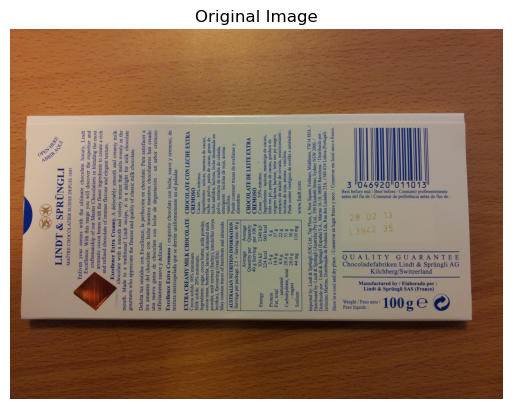

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("chocolate_original.jpg") #reading image
# Convert colour format for correct display
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converting to correct colour scheme
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()


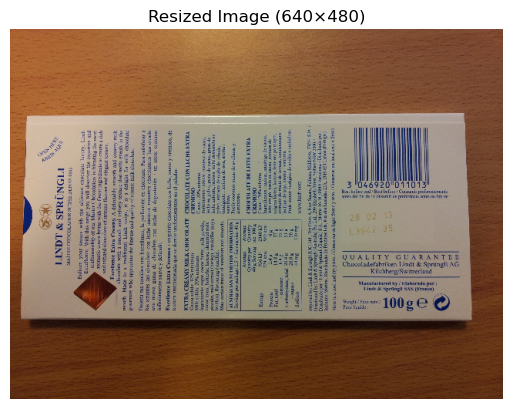

In [ ]:
img_resized = cv2.resize(img, (640, 480))
plt.imshow(img_resized)
plt.title("Resized Image (640×480)")
plt.axis("off")
plt.show()

cv2.imwrite(
"chocolate_640x480.jpg",
cv2.cvtColor(img_resized, cv2.COLOR_RGB2BGR)
)

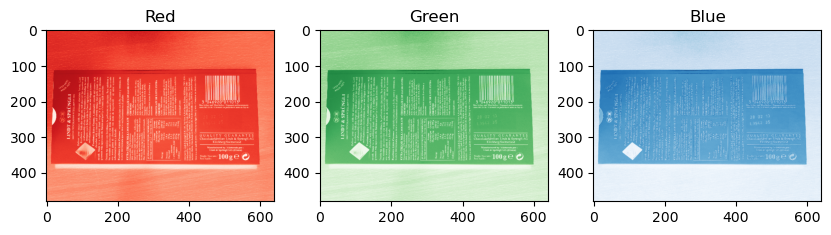

In [6]:
#Defining colour channels
R = img_resized[:, :, 0]
G = img_resized[:, :, 1]
B = img_resized[:, :, 2]

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(R, cmap='Reds')
plt.title("Red")
plt.subplot(1,3,2)
plt.imshow(G, cmap='Greens')
plt.title("Green")
plt.subplot(1,3,3)
plt.imshow(B, cmap='Blues')
plt.title("Blue")
plt.show()

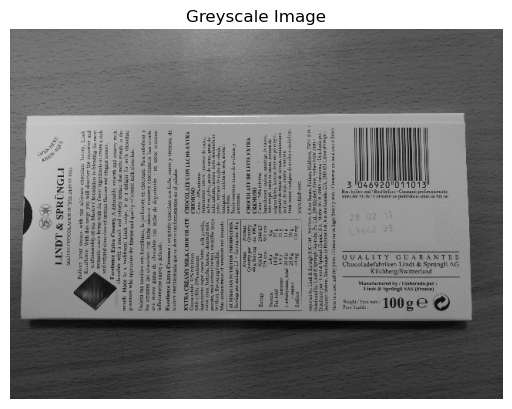

In [7]:
gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Greyscale Image")
plt.axis("off")
plt.show()

Automatic threshold: 105.0


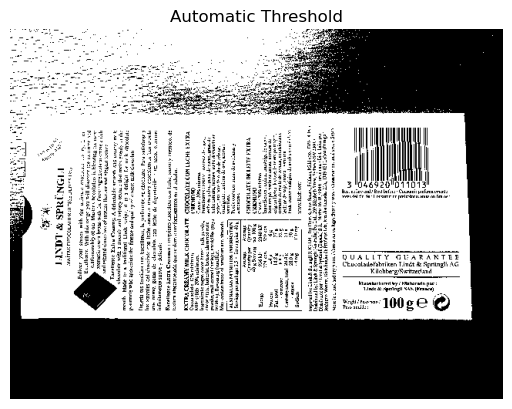

In [ ]:
threshold_value, binary_img = cv2.threshold(
gray,
0, #If value < threshold set to 0
255, #If value < threshold set to 255
cv2.THRESH_BINARY + cv2.THRESH_OTSU 
)
print("Automatic threshold:", threshold_value)
plt.imshow(binary_img, cmap='gray')
plt.title("Automatic Threshold")
plt.axis("off")
plt.show()

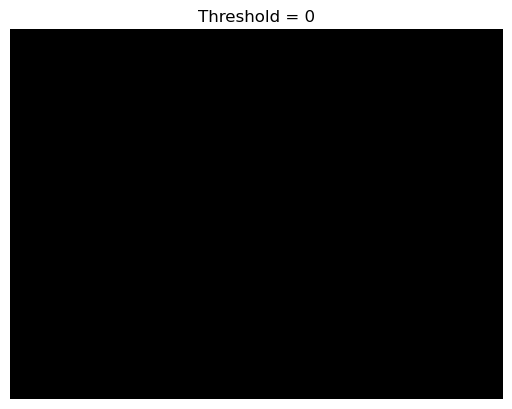

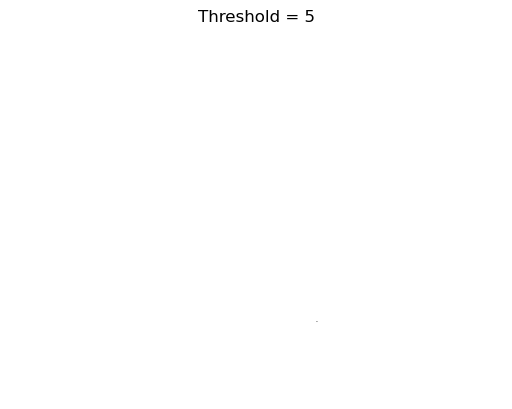

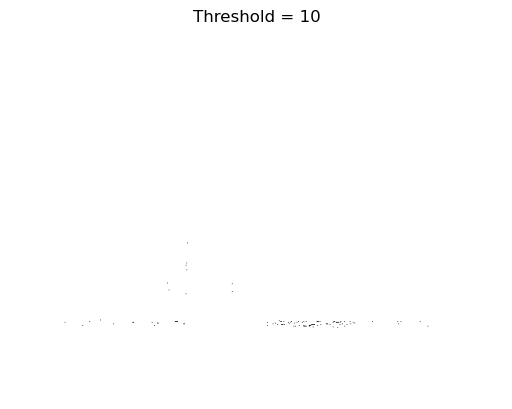

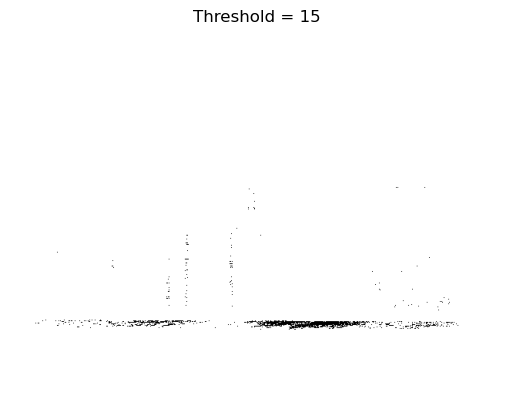

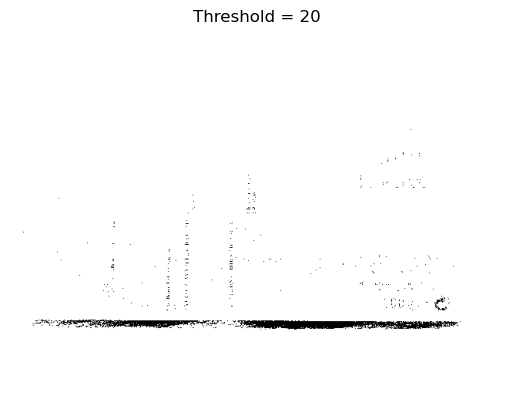

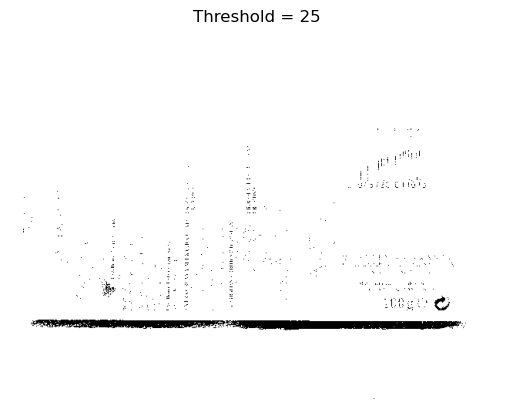

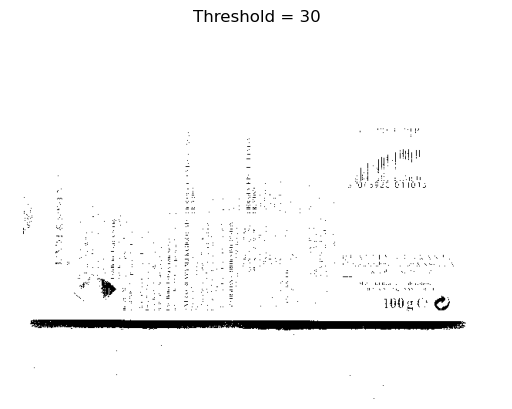

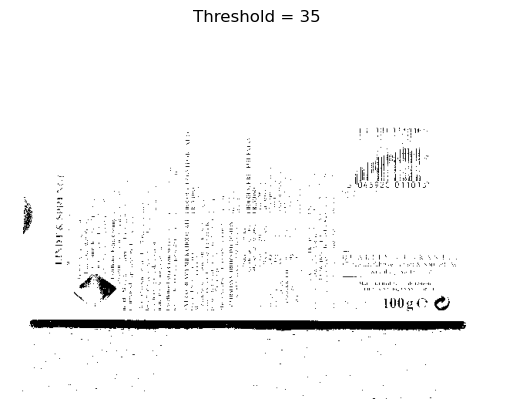

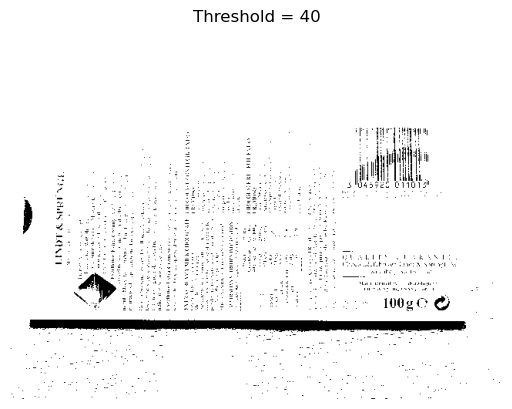

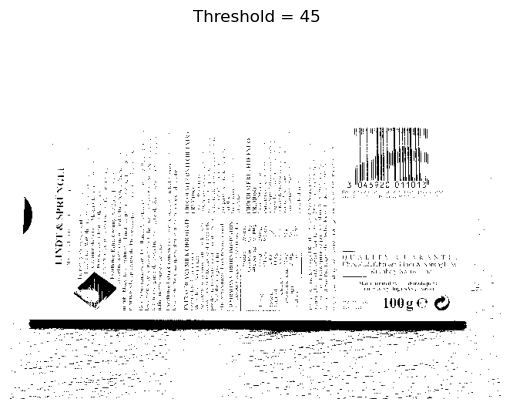

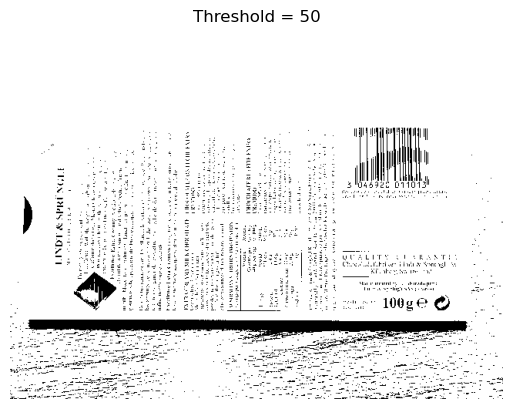

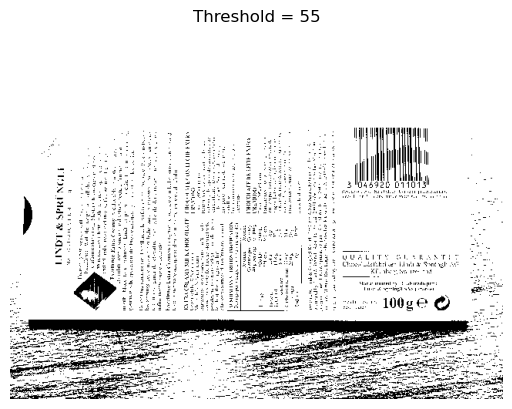

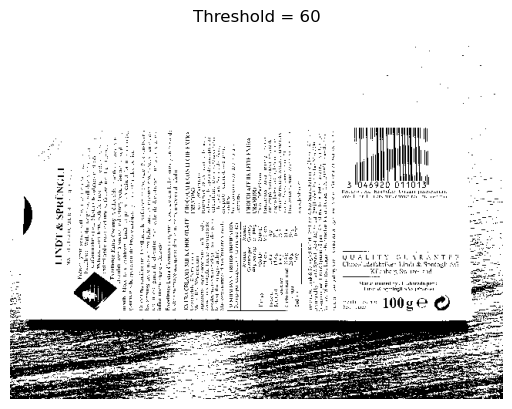

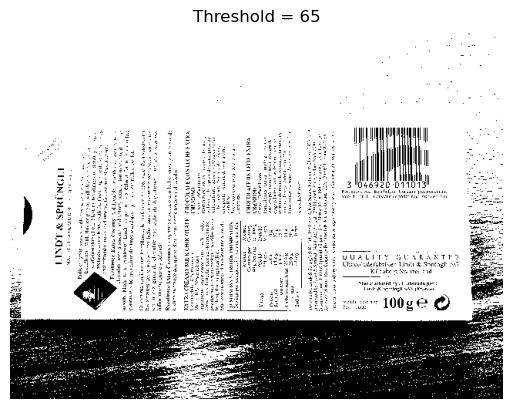

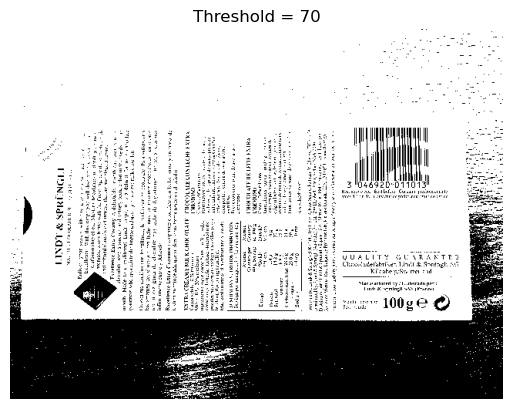

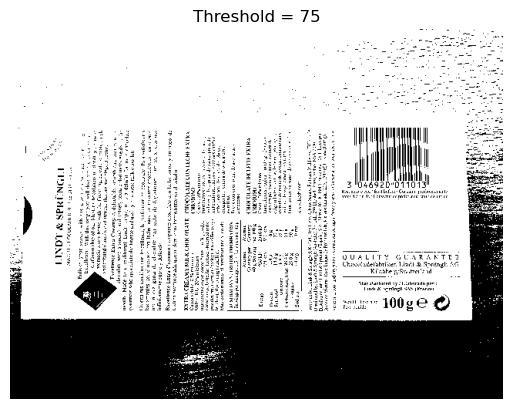

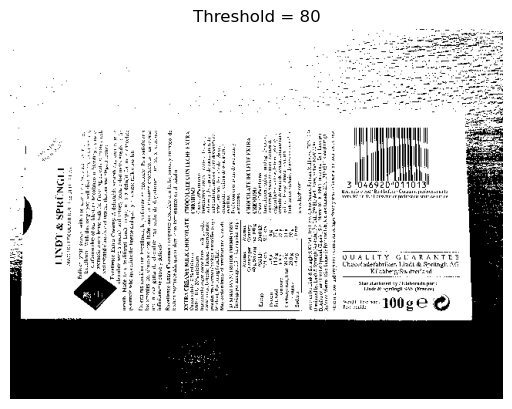

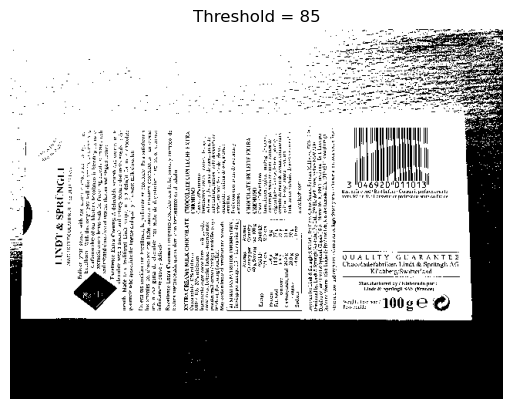

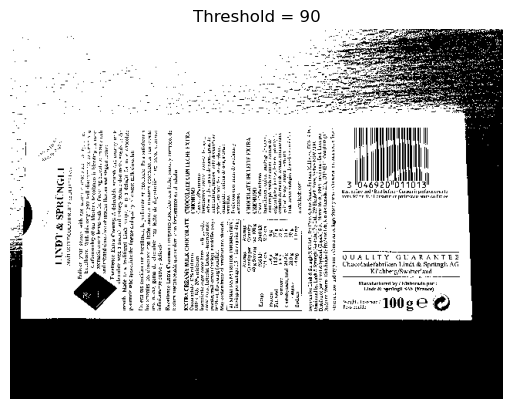

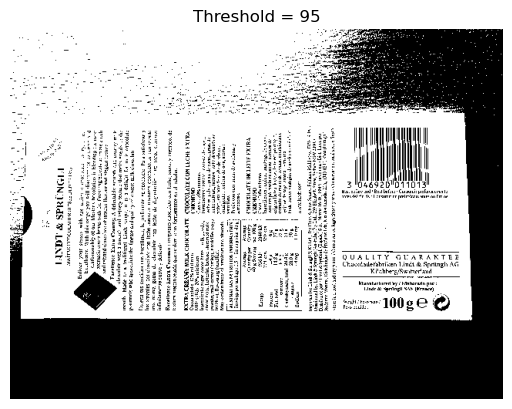

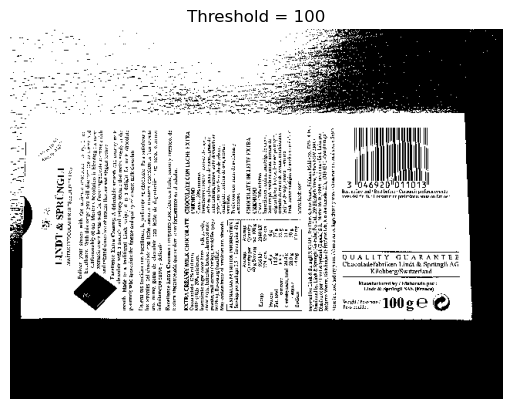

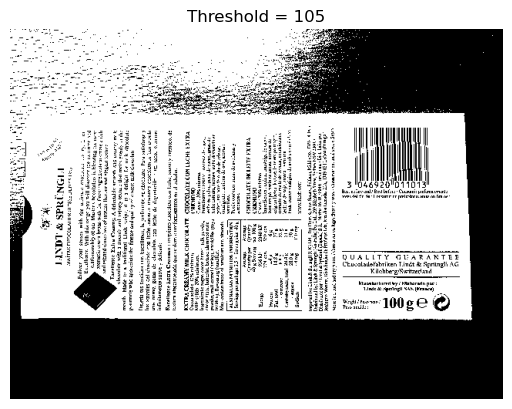

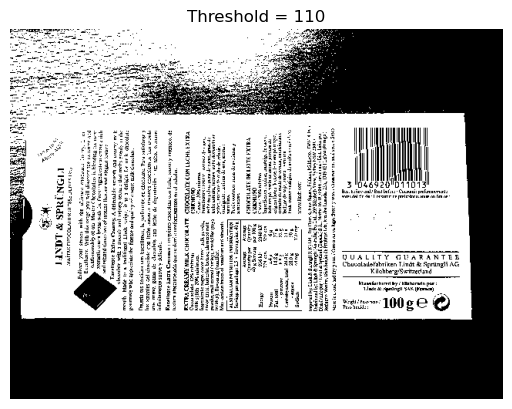

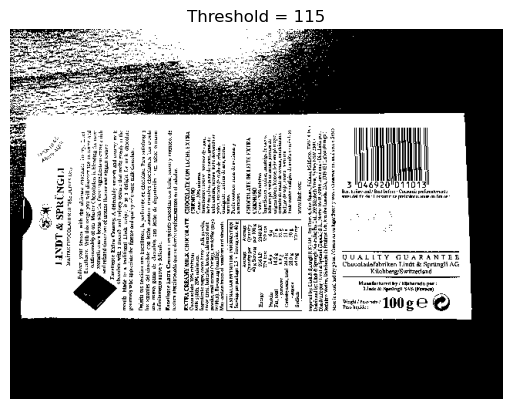

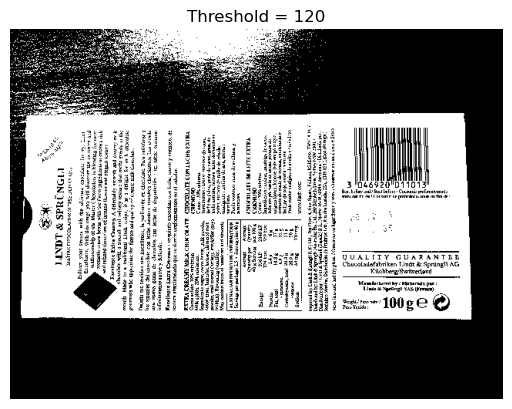

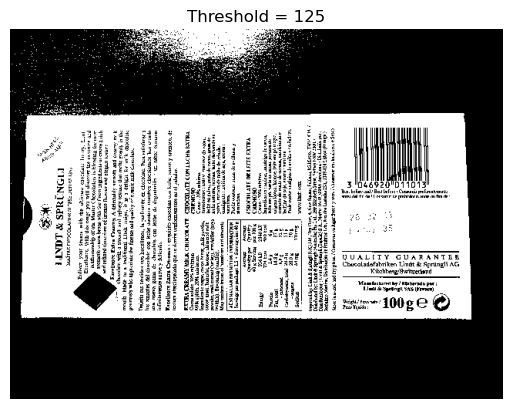

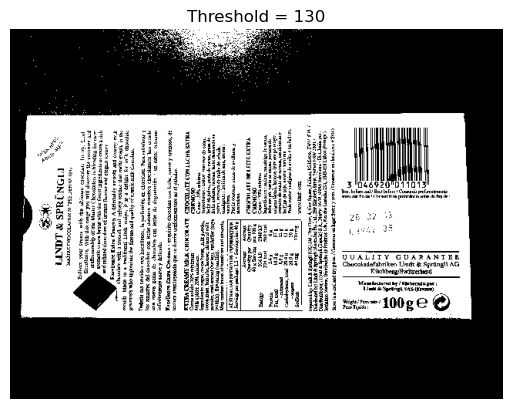

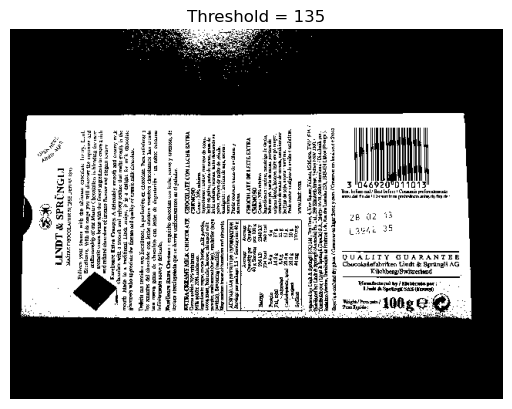

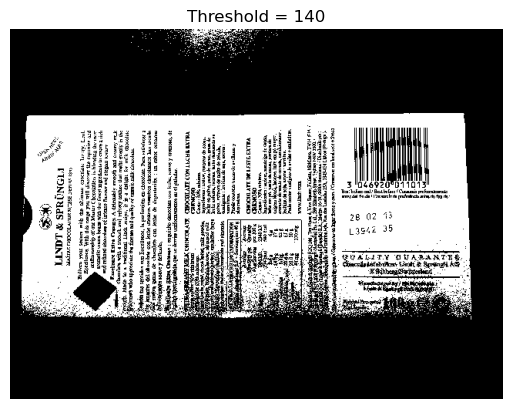

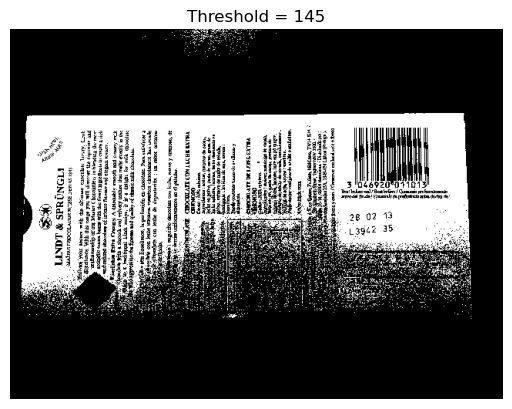

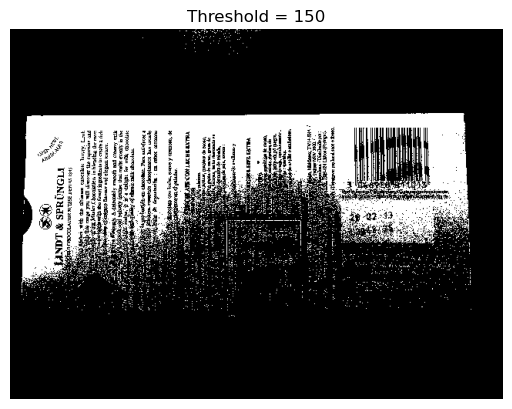

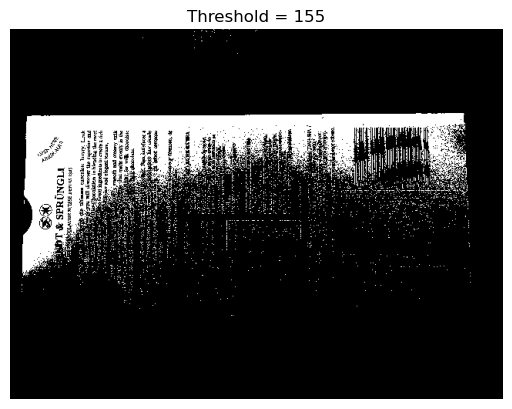

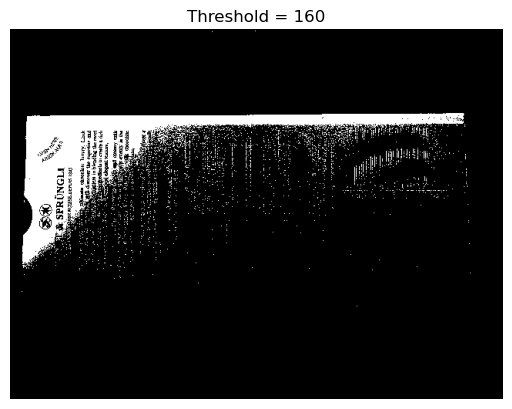

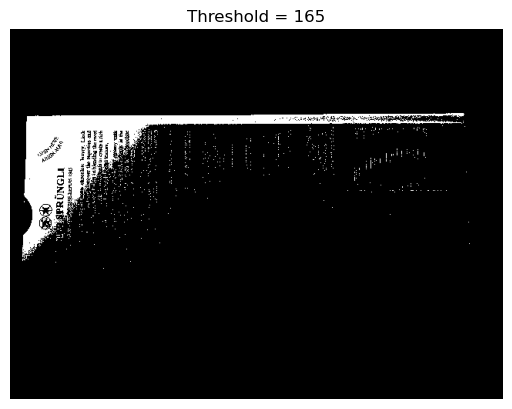

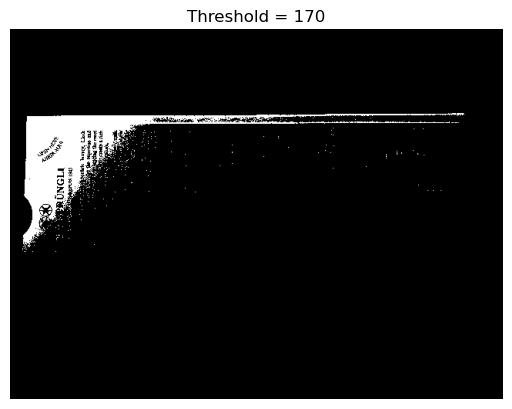

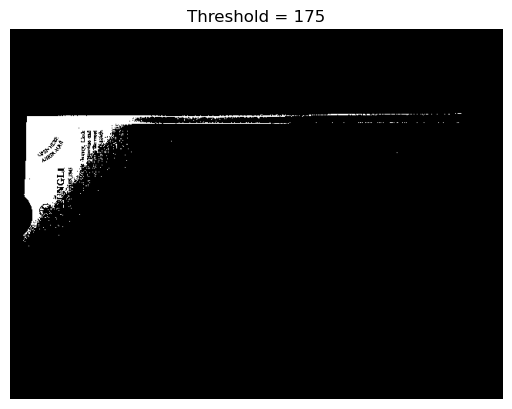

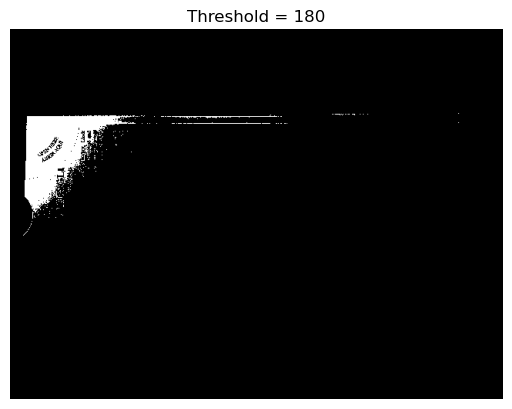

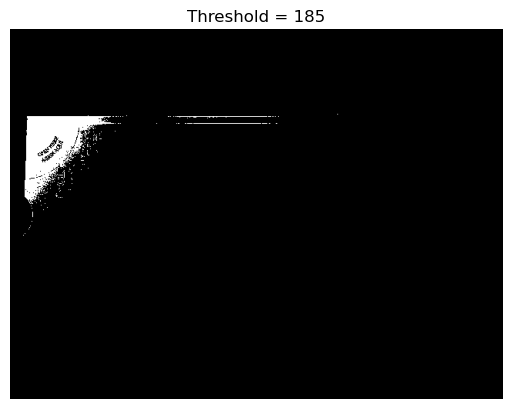

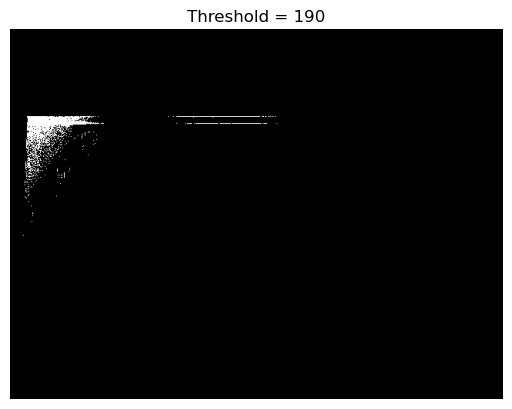

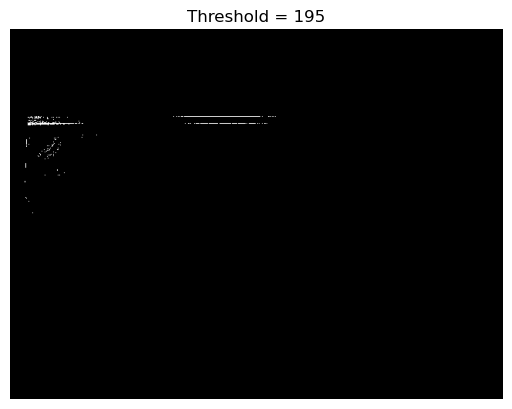

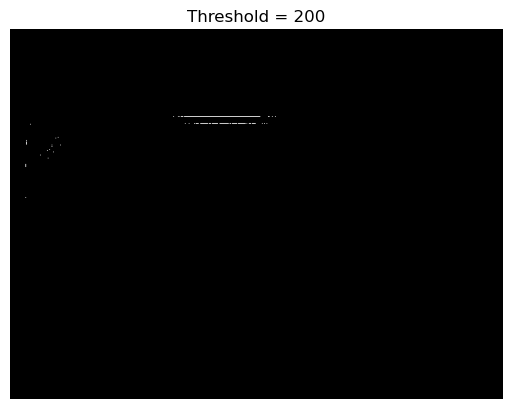

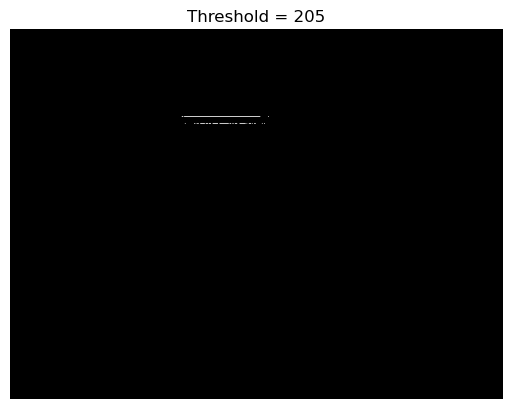

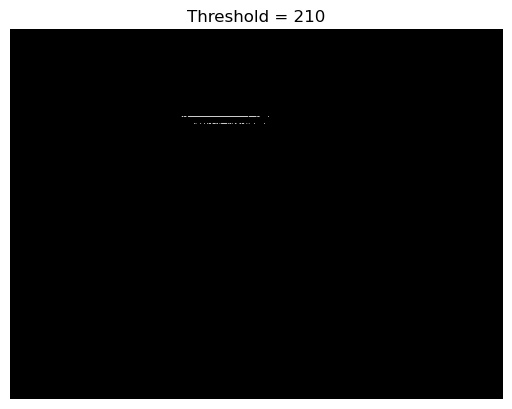

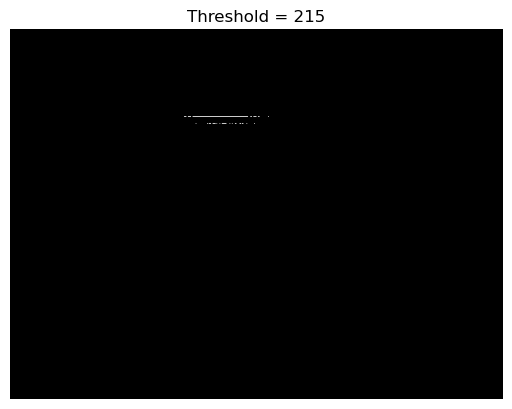

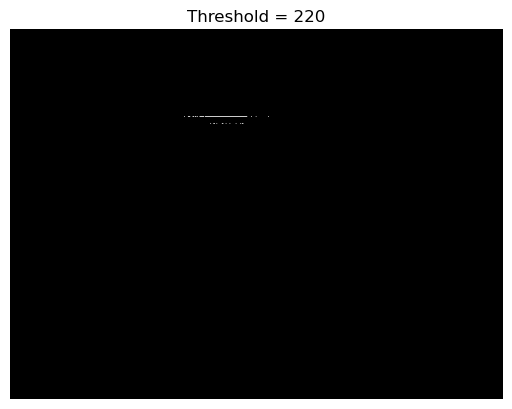

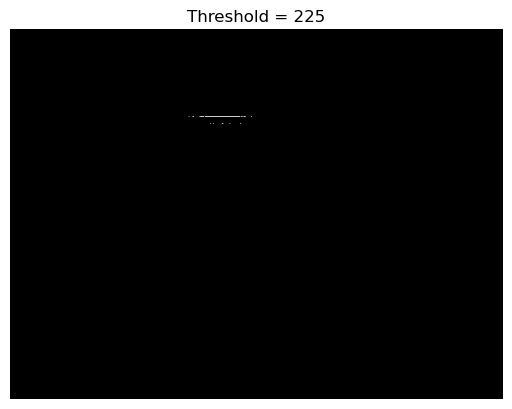

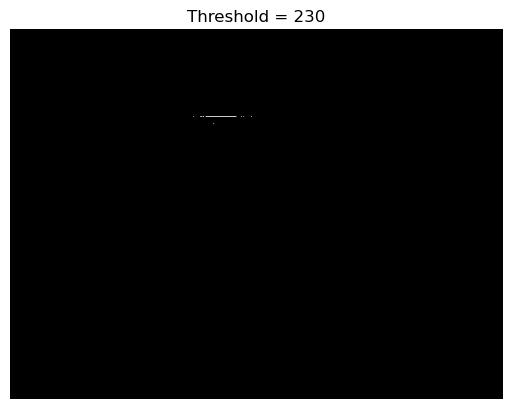

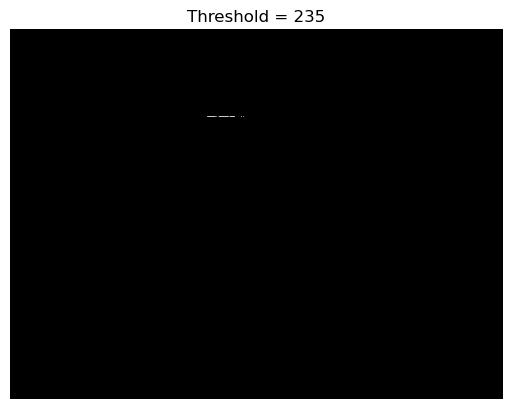

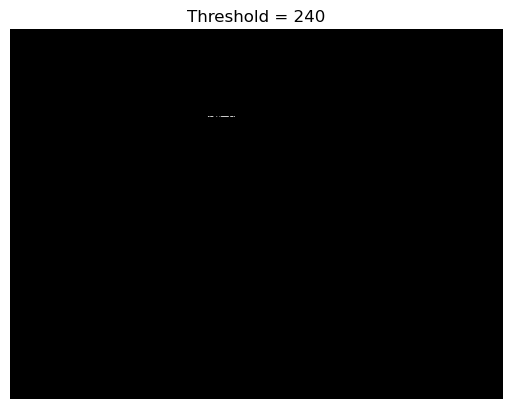

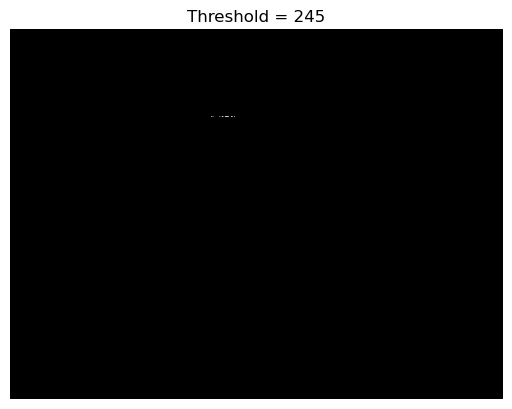

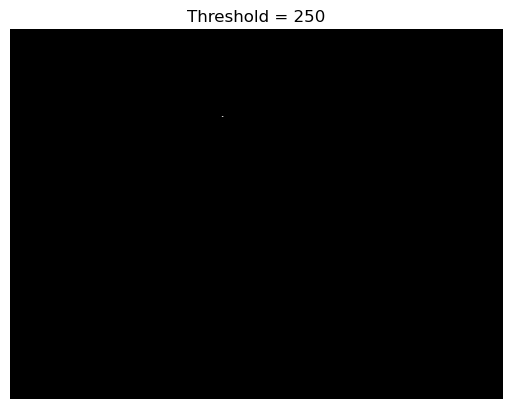

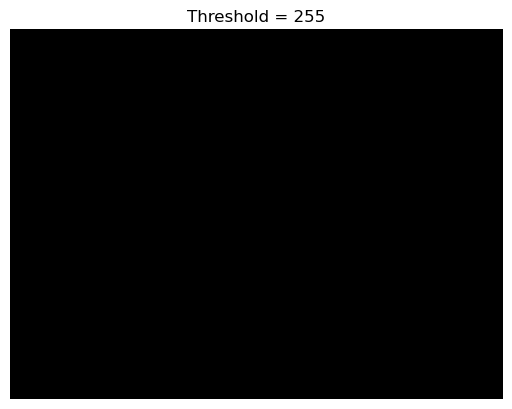

In [13]:
for t in range(0, 256, 5):
    _, temp = cv2.threshold(gray, t, 255,
        cv2.THRESH_BINARY)
    plt.imshow(temp, cmap='gray')
    plt.title(f"Threshold = {t}")
    plt.axis("off")
    plt.pause(0.05)
    plt.show()


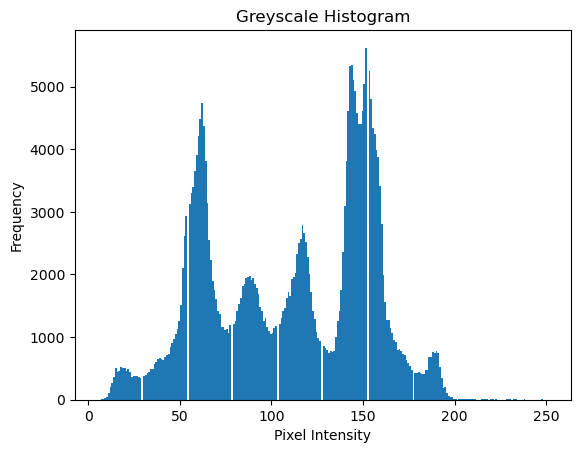

In [14]:
plt.hist(gray.flatten(), bins=256)
plt.title("Greyscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

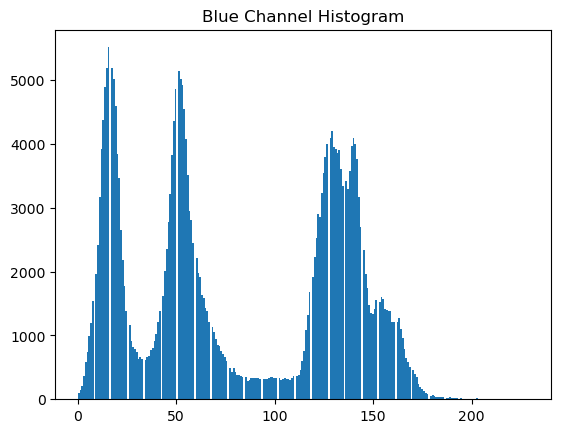

In [15]:
plt.hist(B.flatten(), bins=256)
plt.title("Blue Channel Histogram")
plt.show()

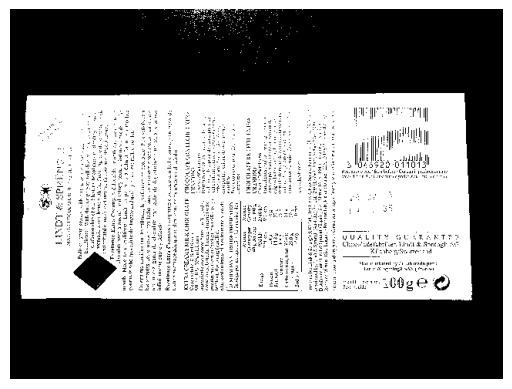

In [16]:
_, blue_binary = cv2.threshold(B, 80, 255,
cv2.THRESH_BINARY)
plt.imshow(blue_binary, cmap='gray')
plt.axis("off")
plt.show()

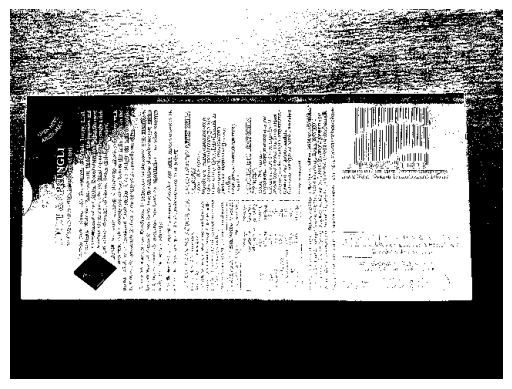

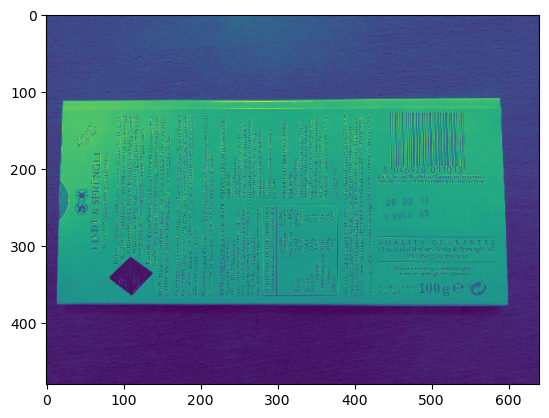

In [31]:
lower_t = 50
upper_t = 150
_, lower_mask = cv2.threshold(B, lower_t, 255,
cv2.THRESH_BINARY)
_, upper_mask = cv2.threshold(B, upper_t, 255,
cv2.THRESH_BINARY)
middle_region = cv2.subtract(lower_mask, upper_mask)
plt.imshow(middle_region, cmap='gray')
plt.axis("off")
plt.show()
plt.imshow(B)

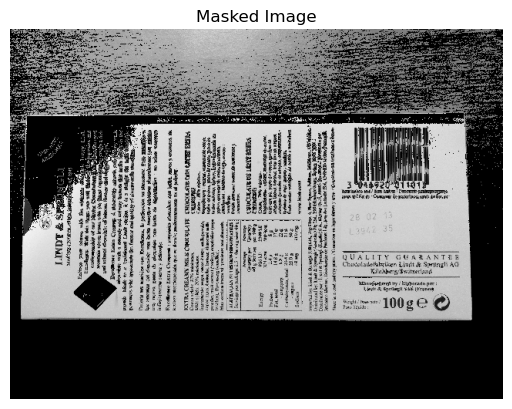

In [20]:
result = cv2.bitwise_and(gray, middle_region)
plt.imshow(result, cmap='gray')
plt.title("Masked Image")
plt.axis("off")
plt.show()

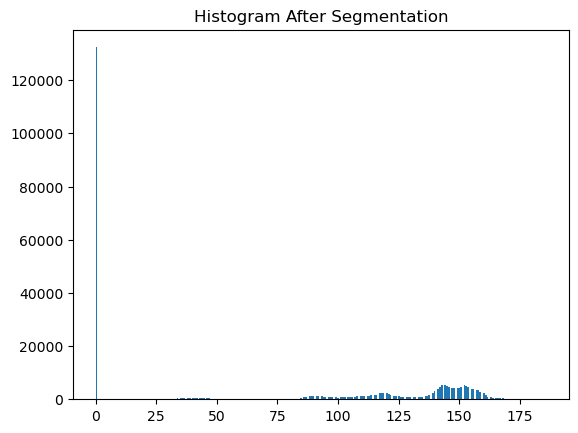

In [21]:
plt.hist(result.flatten(), bins=256)
plt.title("Histogram After Segmentation")
plt.show()

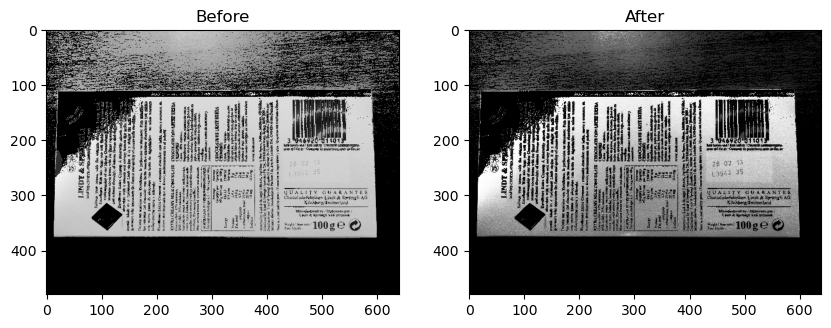

In [27]:
equalised = cv2.equalizeHist(result)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(result, cmap='gray')
plt.title("Before")
plt.subplot(1,2,2)
plt.imshow(equalised, cmap='gray')
plt.title("After")
plt.show()